**Submitted by : Deep Shankar Pratap Singh | Сінгх Діп Шанкар Пратап**

**Educational level: master's degree**

**subject : Deep Learning & Intelligent Systems**

**Specialty: Artificial intelligence systems**

**Study group: KNSSh-11f**

**Institute: ICNI**

**1. Importing Libraries:**

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
#import segmentation_models as sm
from keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
num_classes = 10
epochs = 20

2021-12-12 23:42:55.288439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-12 23:42:55.288456: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


**2. Loading the Dataset:**

In [2]:
# importing dataset
X_train = pd.read_csv("fashion-mnist_train.csv", low_memory=False)
X_test = pd.read_csv("fashion-mnist_test.csv", low_memory=False)


In [3]:
# train dataset
X_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# test dataset
X_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3. Split the dataset:**

In [5]:
y_train = X_train["label"]
X_train = X_train.drop(columns="label")

y_test = X_test['label']
X_test = X_test.drop(columns="label")

**4. Preprocessing**

In [6]:
# convert image into numpy array as type of float 32
X_train = np.array(X_train, dtype="float32")
X_test = np.array(X_test, dtype="float32")

# preprocessing image by dividing into 255.0 value
X_train = X_train/255.0
X_test = X_test/255.0

# reshape images to specify that it's a single channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


**5. Model Building with different optimizers**

In [7]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [8]:
model_1 = Sequential([
    Conv2D(filters=32, kernel_size=3,
           activation='relu', input_shape=image_shape),
    # down sampling the output instead of 28*28 it is 14*14
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),  # flatten out the layers
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')

])
model_1.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(lr=0.001), metrics=['accuracy'])


2021-12-12 23:43:01.272430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 23:43:01.273052: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-12 23:43:01.273160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-12-12 23:43:01.273306: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-12-12 23:43:01.273424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [9]:
history = model_1.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(X_test, y_test),
)

Epoch 1/75
15/15 [==============================] - 7s 421ms/step - loss: 1.6191 - accuracy: 0.4799 - val_loss: 0.9841 - val_accuracy: 0.6805
Epoch 2/75
15/15 [==============================] - 6s 420ms/step - loss: 0.7864 - accuracy: 0.7433 - val_loss: 0.6490 - val_accuracy: 0.7791
Epoch 3/75
15/15 [==============================] - 6s 420ms/step - loss: 0.5996 - accuracy: 0.7931 - val_loss: 0.5483 - val_accuracy: 0.8116
Epoch 4/75
15/15 [==============================] - 6s 417ms/step - loss: 0.5266 - accuracy: 0.8165 - val_loss: 0.4843 - val_accuracy: 0.8386
Epoch 5/75
15/15 [==============================] - 6s 431ms/step - loss: 0.4811 - accuracy: 0.8314 - val_loss: 0.4536 - val_accuracy: 0.8465
Epoch 6/75
15/15 [==============================] - 6s 414ms/step - loss: 0.4547 - accuracy: 0.8424 - val_loss: 0.4288 - val_accuracy: 0.8550
Epoch 7/75
15/15 [==============================] - 6s 429ms/step - loss: 0.4324 - accuracy: 0.8505 - val_loss: 0.4124 - val_accuracy: 0.8609
Epoch 

Text(0.5, 1.0, 'Loss - Accuracy')

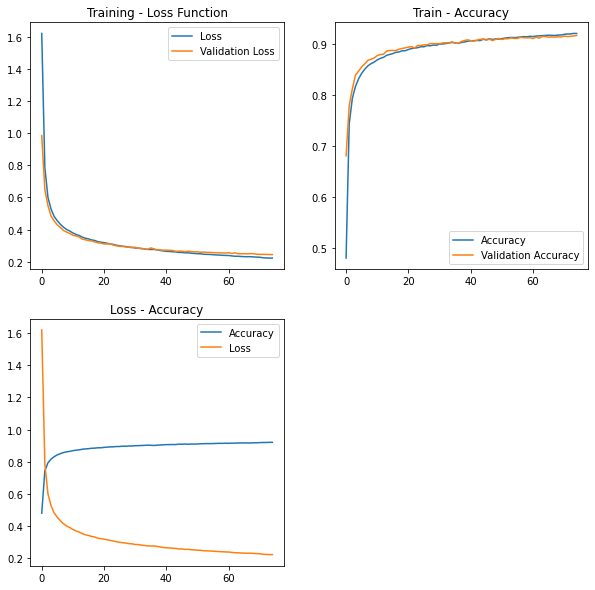

In [10]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

plt.subplot(2, 2, 3)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Loss - Accuracy')


In [13]:
from tensorflow.keras.optimizers import SGD
model_1.compile(loss='sparse_categorical_crossentropy',
                  optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [14]:
history = model_1.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(X_test, y_test),
)

Epoch 1/75
15/15 [==============================] - 6s 409ms/step - loss: 0.2188 - accuracy: 0.9217 - val_loss: 0.2437 - val_accuracy: 0.9172
Epoch 2/75
15/15 [==============================] - 6s 433ms/step - loss: 0.2182 - accuracy: 0.9217 - val_loss: 0.2436 - val_accuracy: 0.9176
Epoch 3/75
15/15 [==============================] - 6s 420ms/step - loss: 0.2187 - accuracy: 0.9221 - val_loss: 0.2436 - val_accuracy: 0.9171
Epoch 4/75
15/15 [==============================] - 6s 421ms/step - loss: 0.2186 - accuracy: 0.9219 - val_loss: 0.2435 - val_accuracy: 0.9178
Epoch 5/75
15/15 [==============================] - 6s 425ms/step - loss: 0.2187 - accuracy: 0.9226 - val_loss: 0.2435 - val_accuracy: 0.9181
Epoch 6/75
15/15 [==============================] - 7s 446ms/step - loss: 0.2185 - accuracy: 0.9221 - val_loss: 0.2434 - val_accuracy: 0.9179
Epoch 7/75
15/15 [==============================] - 7s 444ms/step - loss: 0.2193 - accuracy: 0.9214 - val_loss: 0.2434 - val_accuracy: 0.9177
Epoch 

Text(0.5, 1.0, 'Loss - Accuracy')

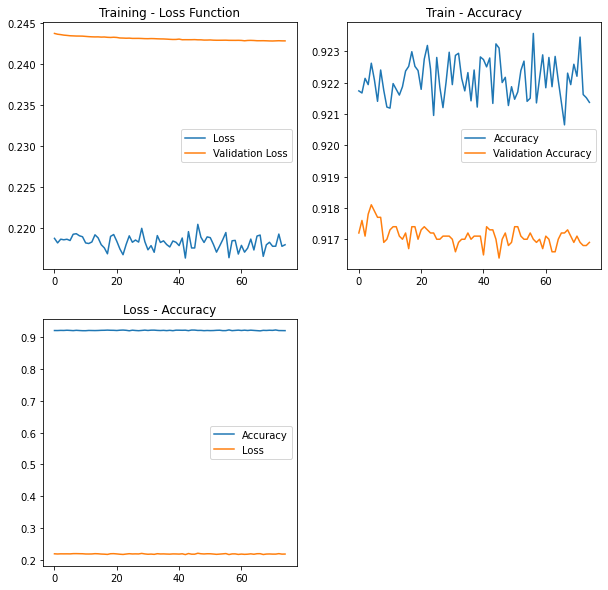

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

plt.subplot(2, 2, 3)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Loss - Accuracy')


**Different Metrics**

In [16]:

model_1.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(lr=0.001), metrics=['accuracy', 'mse', 'mae', 'mape'])

In [17]:
history = model_1.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(X_test, y_test),
)

Epoch 1/75
15/15 [==============================] - 6s 391ms/step - loss: 0.2590 - accuracy: 0.9065 - mse: 27.6864 - mae: 4.4200 - mape: 10000088.0000 - val_loss: 0.2644 - val_accuracy: 0.9055 - val_mse: 27.6873 - val_mae: 4.4200 - val_mape: 10000091.0000
Epoch 2/75
15/15 [==============================] - 6s 380ms/step - loss: 0.2265 - accuracy: 0.9183 - mse: 27.6865 - mae: 4.4200 - mape: 10000087.0000 - val_loss: 0.2443 - val_accuracy: 0.9170 - val_mse: 27.6869 - val_mae: 4.4200 - val_mape: 10000091.0000
Epoch 3/75
15/15 [==============================] - 6s 382ms/step - loss: 0.2198 - accuracy: 0.9218 - mse: 27.6865 - mae: 4.4200 - mape: 10000087.0000 - val_loss: 0.2439 - val_accuracy: 0.9163 - val_mse: 27.6871 - val_mae: 4.4200 - val_mape: 10000091.0000
Epoch 4/75
15/15 [==============================] - 6s 381ms/step - loss: 0.2189 - accuracy: 0.9214 - mse: 27.6867 - mae: 4.4200 - mape: 10000087.0000 - val_loss: 0.2429 - val_accuracy: 0.9156 - val_mse: 27.6873 - val_mae: 4.4200 - 

Text(0.5, 1.0, 'Loss - Accuracy')

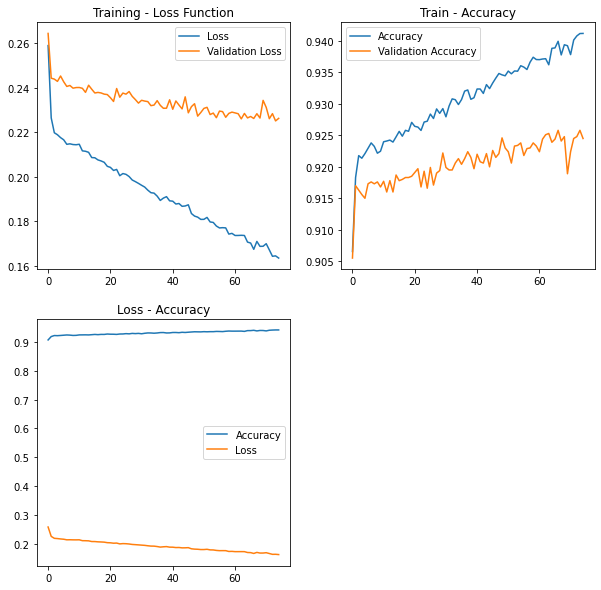

In [18]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

plt.subplot(2, 2, 3)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Loss - Accuracy')
